In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [3]:
# Load the Iris dataset
iris = load_iris()
X = iris.data # create only input data not target

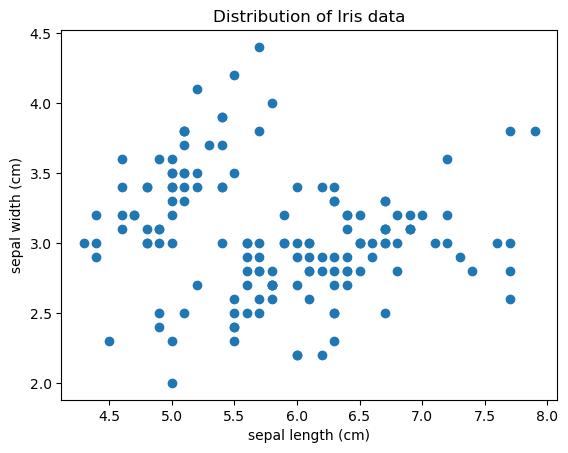

In [4]:
# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1])
#plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Distribution of Iris data')
plt.show()

In [5]:
# Initialize an empty list to store the within-cluster sum of squares
wcss = []

# Try different values of k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k,n_init='auto', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)# here inertia calculate sum of square distance in each cluster

C:\Users\aruns\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\aruns\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\aruns\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\aruns\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

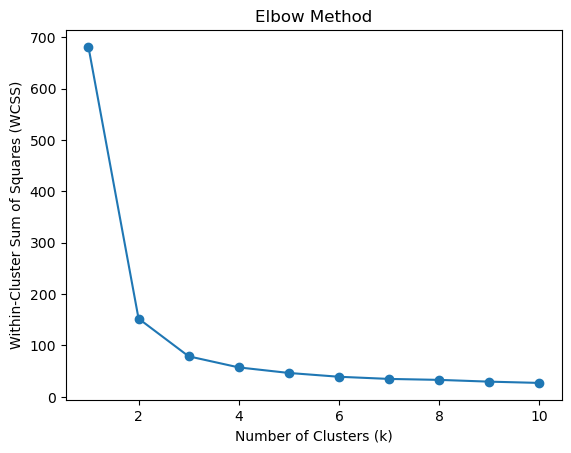

In [6]:
# Plot the within-cluster sum of squares for different values of k
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.show()

In [7]:
# Define the parameter grid
from sklearn.model_selection import GridSearchCV

param_grid = {'n_clusters': [2, 3, 4, 5, 6]}

# Create a KMeans object
kmeans = KMeans(n_init='auto',random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(kmeans, param_grid, cv=5)

# Perform grid search
grid_search.fit(X)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

C:\Users\aruns\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\aruns\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\aruns\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\aruns\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

In [8]:
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'n_clusters': 6}
Best Score: -11.712055907746082


In [9]:
# Perform k-means clustering
k = 6 # Number of clusters
kmeans = KMeans(n_clusters=k,n_init='auto', random_state=42)
kmeans.fit(X)

C:\Users\aruns\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=6, n_init='auto', random_state=42)

In [16]:
# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Add the cluster labels to the DataFrame

df = pd.DataFrame(labels)
df

,0
0,5
1,1
2,1
3,1
4,5
...,...
145,4
146,3
147,4
148,4


In [17]:
df.head()

,0
0,5
1,1
2,1
3,1
4,5


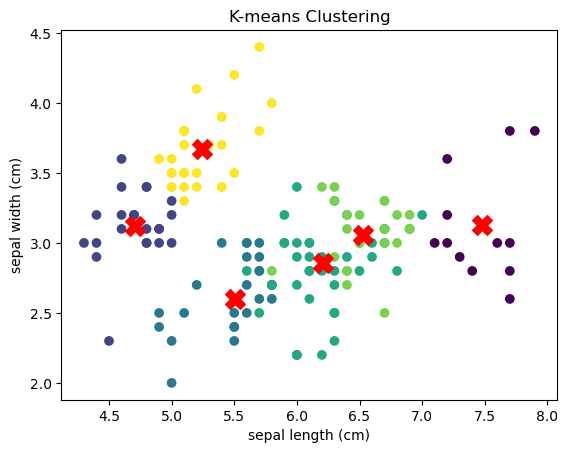

In [12]:
# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('K-means Clustering')
plt.show()